Anti tic-tac-toe! Whoever gets a straight line, loses!

In [1]:
import itertools
import numpy as np
import random 
import matplotlib.pyplot as plt
import copy
import pickle
import pandas
from collections import Counter
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
I = np.array(range(9)).reshape(3,3)
Ind = []
B = I
for i in range(3):
    Ind.append(list(B[i]))
Ind.append(list(np.diag(B)))
B = np.transpose(B)
for i in range(3):
    Ind.append(list(B[i]))
B = np.flipud(B)
Ind.append(list(np.diag(B)))
#Ind

In [3]:
# takes a 3x3 matrix and returns a flat vector of the entries
def flat(x):
    u = list(x.reshape(1,9)[0])
    return u

# returns 1 if all elements of u in the row/column/diagonal corresponding to Ind[j] are equal to a, otherwise 0
def fn(u,j,a):
    y = [u[i] for i in Ind[j]]
    return int(y == [a,a,a])

# the input u is the flat vector entries of a 3x3 matrix of 0,1,2's
# a is the number of rows/columns/diagonals that are 1,1,1 (win for X) 
# and b is the same for 2,2,2 (O)
def how_many_triples(u):
    a = b = 0
    for j in range(8):
        a += fn(u,j,1)
        b += fn(u,j,2)
    return (a,b)

# returns 1 if the number of X's is at most one more than the O's
def balanced(y):
    y = np.array(y)
    # number of X's - number of O's
    l = len(np.where(y == 1)[0])-len(np.where(y == 2)[0])
    return int(l == 0 or l == 1)

def count_xo(y):
    y = np.array(y)
    a = len(np.where(y == 1)[0]) # how many X's
    b = len(np.where(y == 2)[0]) # how many O's
    return (a,b)

# input x is a list and the output is the indices that are equal to zero
def free_entries(x):
    y = np.array(x)
    return list(np.where(y == 0)[0])

# put 1 or 2 at the index i depending on xo = 1,2
def add(x,i,xo):
    xprime = x
    xprime[i] = xo
    return xprime

# prints a 3x3 board
def print_board(board):
    for row in board:
        print " ".join(row)

def aux_vis(g):
    out = ''
    if g == 1:
        out = 'x'
    elif g == 2:
        out = 'o'
    elif g == 0:
        out = '_'
    return out

def visualize(G):
    G_out = [aux_vis(g) for g in G]
    G_out =  np.array(G_out).reshape(3,3)
    return print_board(G_out)

# with visualization
def random_ttt_vis():
    G = 9*[0] # the game
    I = range(9) # the indices
    i = 0 # the zeroth move
    game_summary = []
    game_states = []
    
    while how_many_triples(G) == (0,0) and I != []:
        # if #X=#O, it's X's turn
        # if #X=#O+1, it's O's turn
        (a,b) = count_xo(G)
        
        print 'I: ',I
        
        if a == b:
            # X plays
            print 'X plays'
            r = random.choice(I)
            G = add(G,r,1)
            r_ind = I.index(r)
            I.pop(r_ind)
            
        if a == b+1:
            # O plays
            print 'O plays'
            r = random.choice(I)
            G = add(G,r,2)
            r_ind = I.index(r)
            I.pop(r_ind)
            
        game_summary.append(r)
        game_states.append(A.index(G))
            
        print 'The active index: ',r
                
        print 'State A[%s]' % (S.index(G)),'=', G
        visualize(G)
        print ''
        print 'Value of G :',V[S.index(G)]
        print '------------------'
        
    if how_many_triples(G) == (1,0):
        print 'O wins anitTTT'
    elif how_many_triples(G) == (0,1):
        print 'X wins antiTTT'
    else:
        print 'Draw!'  
    
    print 'Value of the final state :',V[S.index(G)]
    
    return game_states

# the output is the sequence of states of a game
def random_ttt():
    
    G = 9*[0] # the game
    I = range(9) # the indices
    i = 0 # the zeroth move
    game_summary = []
    game_states = []
    
    while how_many_triples(G) == (0,0) and I != []:
        # if #X=#O, it's X's turn
        # if #X=#O+1, it's O's turn
        (a,b) = count_xo(G)
                
        if a == b:
            # X plays
            r = random.choice(I)
            G = add(G,r,1)
            r_ind = I.index(r)
            I.pop(r_ind)
            
        if a == b+1 and a+b<8: # the second condition is necessary to avoid trying to play after the game is over
            # O plays
            r = random.choice(I)
            G = add(G,r,2)
            r_ind = I.index(r)
            I.pop(r_ind)
            
        game_summary.append(r)
        game_states.append(S.index(G))
    
    return game_states

step = 0.9

def val_update(L):
    l = len(L)
    for i in range(l-2,-1,-1):
        #print L[i],L[i+1]
        V[L[i]] = V[L[i]] + step *(V[L[i+1]]-V[L[i]])
        
def play():
    
    print 'Positions on the ttt board:'
    print_board(np.array([str(t) for t in range(1,10)]).reshape(3,3))
    print ''
    
    G = 9*[0] 
    O = []
    L = [] # summary of the game
    
    while (sum(how_many_triples(G))==0 and len(free_entries(G))>0):
        
        if len(free_entries(G)) == 1:  # if it's the last free spot
            p = free_entries(G)[0]+1
            print 'Your last move:'
        else:                          # if there are multiple options
            p = input('Your move:')
            while p-1 not in free_entries(G):
                print 'Try again or press 0 to exit: '
                p = input('Your move:')
                if p == 0:
                    return
            
        print ''
        G = add(G,p-1,1)
        visualize(G)
        L.append(S.index(G))
        print ''
        if how_many_triples(G) == (1,0):
            print 'O wins!'
            break
        print ''
        
        # O's turn
        O = free_entries(G) # list the free spots
        
        # contniue if we don't have a winner and the game is still running
        if (sum(how_many_triples(G))==0 and len(free_entries(G))>0): 
            states = [] # a list of possible subsequent states
            vals = [] # make a list of the possible values
        
            for p in O:
                s = copy.copy(add(G,p,2))
                states.append(s)
                add(G,p,0)
                     
            # greedy choice of move for O    
            Ind = [S.index(g) for g in states] # find the indices of the states
            vals = [V[i] for i in Ind]         # look up the values of these states
            argmax = np.int(np.argmax(np.array(vals))) # pick the index of the best next state
            G = states[argmax] # the state itself
            L.append(S.index(G))
            visualize(G)
            print ''
            
    if how_many_triples(G) == (0,0):
        print 'Draw!'
    elif how_many_triples(G) == (0,1):
        print 'X wins'
        
    val_update(L) # learn from this game
    upd_values()  # save changes to table of values
    
def upd_values():
    with open("values.txt", "wb") as fp:   #Pickling
        pickle.dump(V, fp)
        
def upd_states() :      
    with open("states.txt", "wb") as fp:   
        pickle.dump(S, fp)

def load_values():
    with open("values.txt", "rb") as fp:   # Unpickling
        V = pickle.load(fp)
    with open("states.txt", "rb") as fp:   
        S = pickle.load(fp)
    return (V,S)

def rnd_play():
    
    G = 9*[0] 
    O = []
    L = [] # summary of the game
    
    while (sum(how_many_triples(G))==0 and len(free_entries(G))>0):
        
        #print ''
        p = random.choice(free_entries(G))
        G = add(G,p,1)
        L.append(S.index(G))
        
        if (how_many_triples(G)==(1,0) or len(free_entries(G)) == 0):
            break
        
        # O's turn
        O = free_entries(G) # list the free spots
        
        # contniue if we don't have a winner and the game is still running
        if (sum(how_many_triples(G))==0 and len(free_entries(G))>0): 
            states = [] # a list of possible subsequent states
            vals = [] # make a list of the possible values
        
            for p in O:
                s = copy.copy(add(G,p,2))
                states.append(s)
                add(G,p,0)
                     
            # greedy choice of move for O    
            Ind = [S.index(g) for g in states] # find the indices of the states
            vals = [V[i] for i in Ind]         # look up the values of these states
            argmax = np.int(np.argmax(np.array(vals))) # pick the index of the best next state
            G = states[argmax] # the state itself
            L.append(S.index(G))
        
    val_update(L) # learn from this game
    upd_values()  # save changes to table of values
    
    return how_many_triples(G)

def hist_val(n,param,file='histogram_values_1.jpg'):
    plt.title('Histogram of the values with alpha=%f'% param)
    plt.xlabel('V(s)')
    plt.ylabel('count')
    plt.hist(V)
    plt.savefig(file)
    plt.show()
    
    
# training n times on random games

def train(n):
    for i in range(n):
        L = random_ttt()
        val_update(L)
        
# initialize the vector of values
def init_values(S):
    V = (len(S))*[0]

    for i in range(len(S)):
        (a,b) = how_many_triples(S[i])
        if a == 1: # reward: X gets a straight triple, hence loses
            V[i] = 1
        elif b == 1: # penality: O gets a straight triple
            V[i] = 0
        else:
            V[i] = 0.5 # potentially could go either way
    
    return V

# make a histogram of who wins in random test runs
def test(n, step, file='hist_test_1.jpg'):
    R = []

    for i in range(n):
        T = rnd_play()
        R.append(T)

    U = []

    for x in R:
        if x == (1,0):
            U.append('O wins')
        elif x == (0,1):
            U.append('X wins')
        else:
            U.append('Draw')

    letter_counts = Counter(U)
    df = pandas.DataFrame.from_dict(letter_counts, orient='index')
    df.plot(kind='bar')
    plt.gcf().subplots_adjust(bottom=0.15)
    plt.title('Testing against a random player %s times with alpha = %f' %(n,step))
    plt.savefig(file)
    plt.show()
    
    letter_counts = Counter(U)
    v = letter_counts.values()
    print ('Accuracy: the machine, Oh, wins %d percent of the times.' % int(100*tuple(v)[0]/float(n)//1))

In [4]:
(V,S) = load_values()

In [5]:
play()

Positions on the ttt board:
1 2 3
4 5 6
7 8 9

Your move:3

_ _ x
_ _ _
_ _ _


_ _ x
o _ _
_ _ _

Your move:1

x _ x
o _ _
_ _ _


x _ x
o _ _
_ _ o

Your move:6

x _ x
o _ x
_ _ o


x _ x
o o x
_ _ o

Your move:7

x _ x
o o x
x _ o


x _ x
o o x
x o o

Your last move:

x x x
o o x
x o o

O wins!


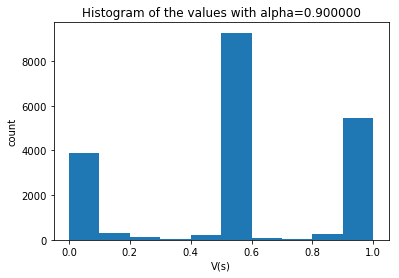

In [7]:
hist_val(V,step)

In [8]:
train(1000)